# Best and worst movies as ranked on IMDB

Submitted by: Joseph Min, Muhammad Younis, Timothy Yao

In this post, we will visualize the latent factors of $V$, where $V$ is obtained from bias-corrected matrix factorization of the [MovieLens](https://grouplens.org/datasets/movielens/100k/) dataset. There are 1682 movies in this dataset, which is a large number to visualize at once. Therefore, we will focus on the best 10 and worst 10 movies as ranked on the Internet Movie Database (IMDB). Specifically, the list of best 10 movies were obtained by comparing the [IMDB Top Rated Movies](https://www.imdb.com/chart/top/?ref_=nv_mv_250) with the list of movies in the dataset. Since there are many movies in the IMDB list but not in our dataset, we took the top 10 that were present in both. Similarly, the worst 10 movies were obtained by comparing the [IMDB Lowest Rated Movies](https://www.imdb.com/chart/bottom).

In order to be placed on either IMDB list, a movie must be rated by at least 10,000 users (25,000 for best, 10,000 for worst). Therefore, we hypothesized that the ratings in our dataset would well-approximate the IMDB ratings. Furthermore, we expected the two lists will show noticeable differences in their latent factors.

### Import packages and load data

In [333]:
import sys
sys.path.append('..')

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.svm import SVC

from src import bias_SVD
from src import utils

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [240]:
df_data = utils.load_data()
df_movies = utils.load_movies()

top = [
    63,   # 1. The Shawshank Redemption
    126,  # 2. The Godfather
    186,  # 3. The Godfather: Part II
    177,  # 5. 12 Angry Men
    317,  # 6. Schindler's List
    55,   # 8. Pulp Fiction
    176,  # 9. The Good, the Bad and the Ugly
    68,   # 12. Forest Gump
    171,  # 14. Star Wars: Episode V - The Empire Strikes Back
    181,  # 17. Goodfellas
]

bottom = [
    1335,  # 35. Kazaam
    262,   # 39. Steel
    313,   # 47. 3 Ninjas: High Noon at Mega Mountain
    1214,  # 49. Barb Wire
    351,   # 57. Spice World
    547,   # 58. The NeverEnding Story III
    253,   # 68. Batman & Robin
    452,   # 70. Jaws 3-D
    889,   # 74. Mortal Kombat: Annihilation
    1088,  # 87. Speed 2: Cruise Control
]

In [234]:
df_data

,user_id,movie_id,rating
0,195,241,3
1,185,301,3
2,21,376,1
3,243,50,2
4,165,345,1
...,...,...,...
99995,879,475,3
99996,715,203,5
99997,275,1089,1
99998,12,224,2


In [235]:
df_movies

,movie_id,title,unknown,action,adventure,animation,childrens,comedy,crime,documentary,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,0,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1677,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1678,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1679,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1680,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Run matrix factorization with bias correction

In [239]:
%%time
Y = df_data.values
M = len(df_data.user_id.unique())
N = len(df_data.movie_id.unique())

# Factorization params
K = 20
reg = 0.1
eta = 0.03

U, V, a, b, err = bias_SVD.train_model(M, N, K, eta, reg, Y)
print(f'Error: {err}')

Currently on epoch #5..
Currently on epoch #10..
Currently on epoch #15..
Currently on epoch #20..
Currently on epoch #25..
Currently on epoch #30..
Stopping at epoch #30
Model training is complete!
Error: 26486.833614765015
CPU times: user 2min 27s, sys: 3.24 s, total: 2min 30s
Wall time: 2min 13s


### Visualize the latent factors and cluster

In [241]:
A, s, vh = np.linalg.svd(V.T)
V_bar = (A[:,:2].T @ V.T).T

In [242]:
V_bar.shape

(1682, 2)

In [334]:
svc = SVC(C=1)
svc.fit(points, [0] * 10 + [1] * 10)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [350]:
from sklearn.cluster import AgglomerativeClustering

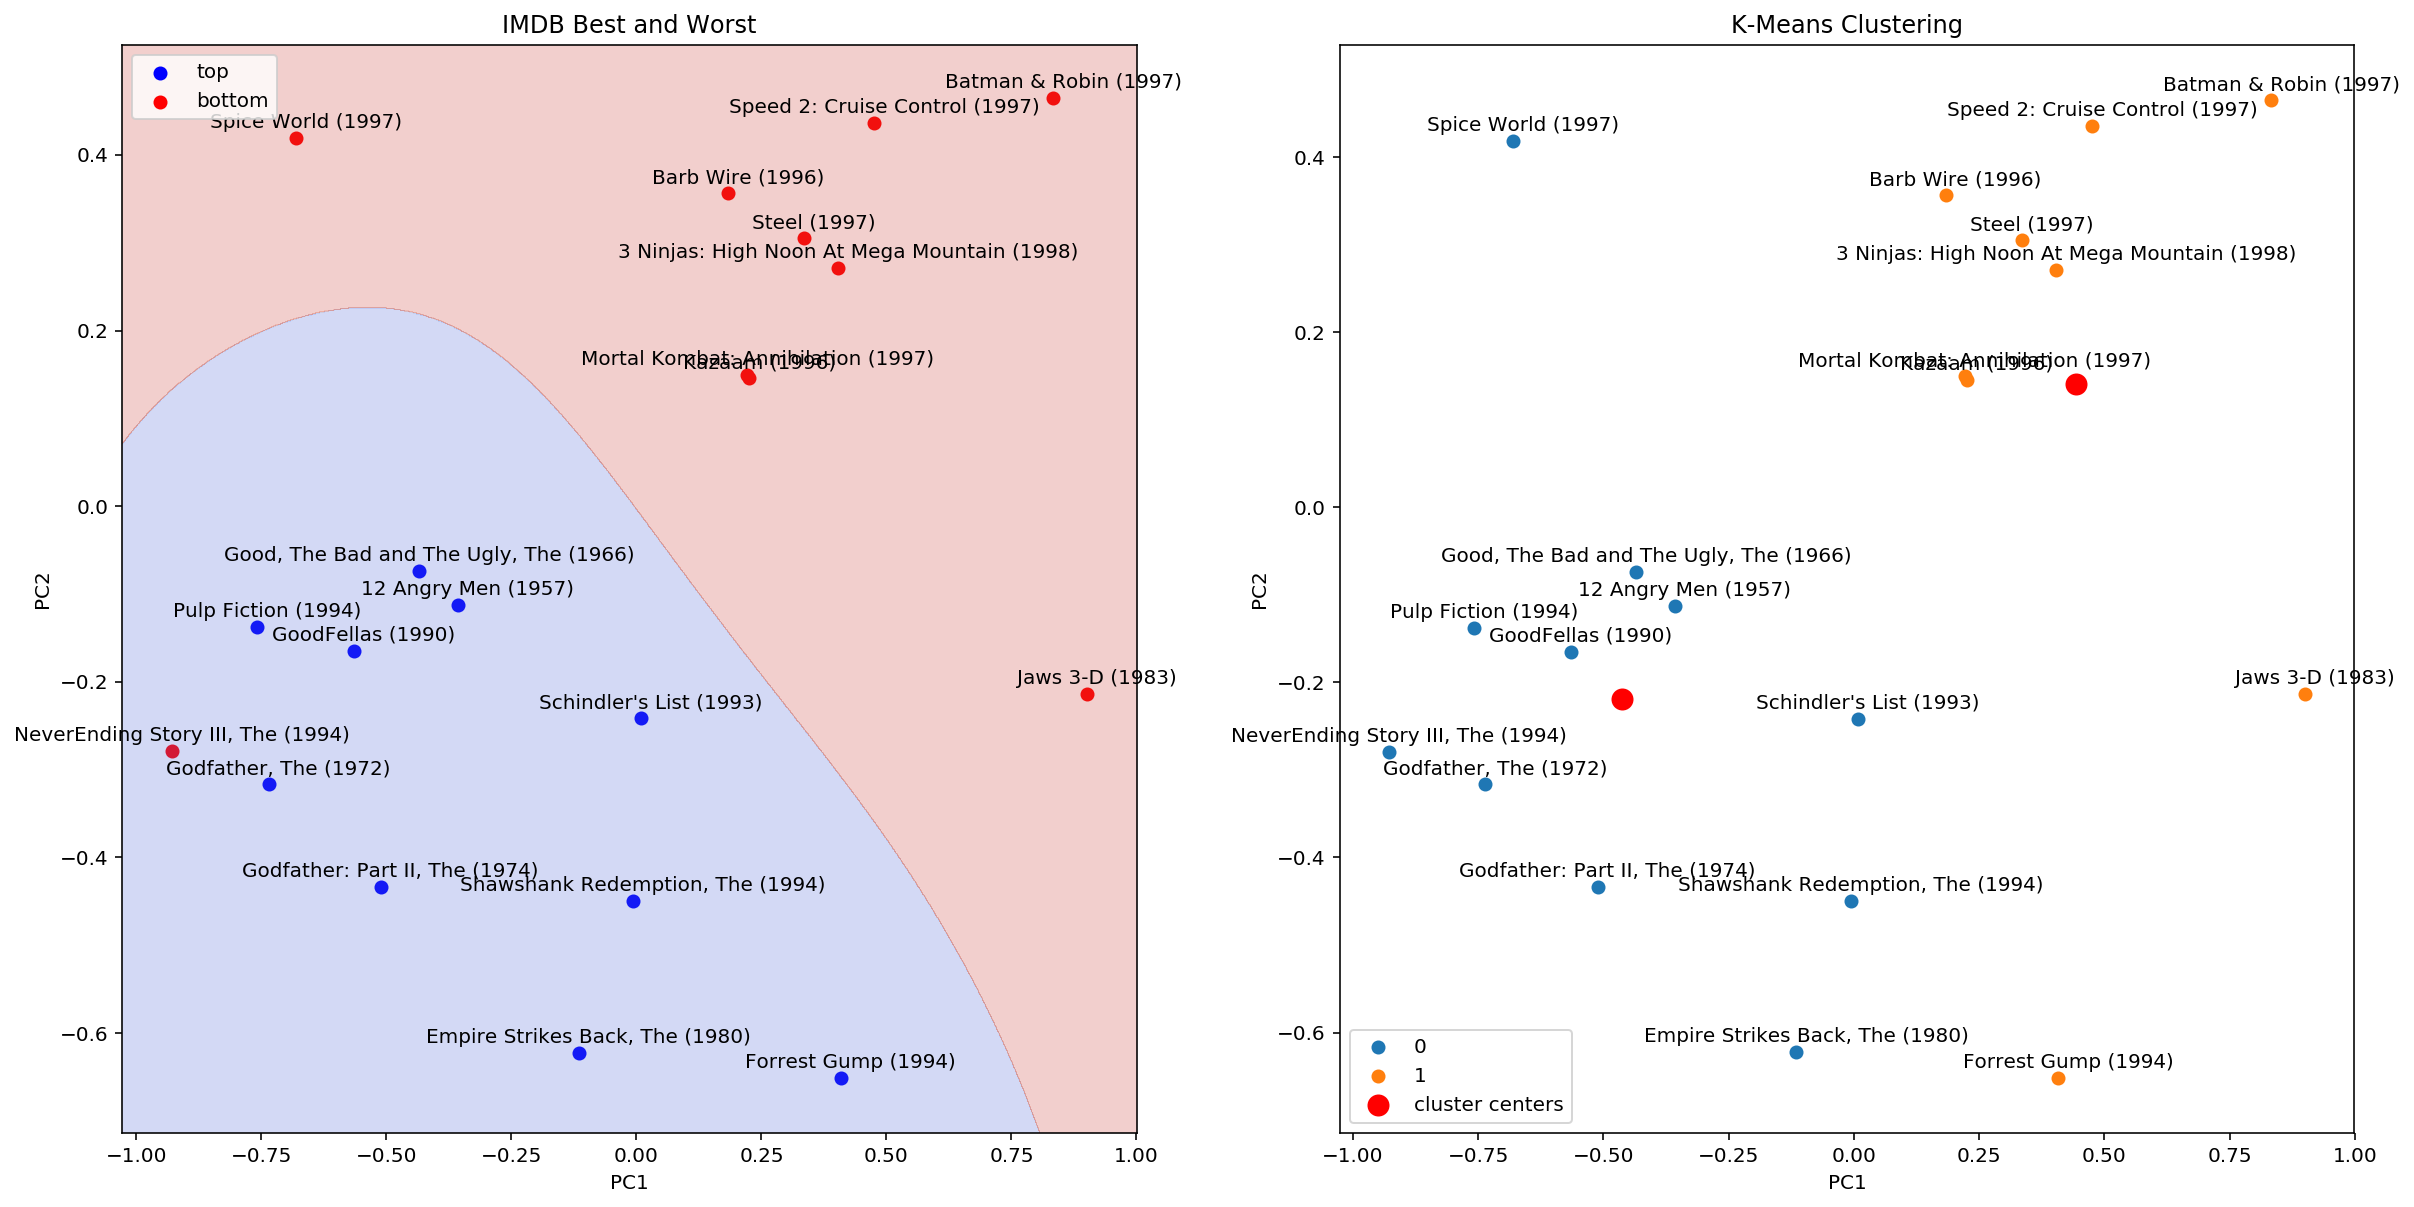

In [359]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))

# Ground truth
axes[0].scatter(V_bar[top,0], V_bar[top,1], label='top', c='blue')
axes[0].scatter(V_bar[bottom,0], V_bar[bottom,1], label='bottom', c='red')

# Save limits to rescale later
xlim = axes[0].get_xlim()
ylim = axes[0].get_ylim()

# SVM decision boundary
h = .001
x_min, x_max = points[:, 0].min() - 0.1, points[:, 0].max() + 0.1
y_min, y_max = points[:, 1].min() - 0.1, points[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axes[0].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.25)

# Restore limits
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)

axes[0].legend()
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('IMDB Best and Worst')

indices = top + bottom
points = V_bar[indices] 

# KMeans
km = KMeans(n_clusters=2)
km.fit(points)
clusters = km.labels_
for cluster in np.unique(clusters):
    cluster_points = points[clusters == cluster]
    axes[1].scatter(cluster_points[:,0], cluster_points[:,1], label=cluster)
axes[1].scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], label='cluster centers', c='red', s=100)
axes[1].legend()
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('K-Means Clustering')

# Add titles
for movie_id in top + bottom:
    for ax in axes: 
        ax.annotate(
            df_movies.set_index('movie_id').loc[movie_id].title,
            (V_bar[movie_id,0], V_bar[movie_id, 1]),
            textcoords='offset points',
            xytext=(5, 5),
            ha='center'
        )
utils.save_fig(fig, 'piazza.png')

The plot on the left displays first two principal components of the 20 films, categorized by whether they were in the best or worst movies list. The model was trained with $K=10$, regularization strength $0.1$, and learning rate $0.03$. We notice a separation between the two groups (top right and bottom left). We quantified this separation with a SVM with a RBF kernel and no regularization. The decision boundary is displayed as blue and red contours. Interestingly, *The NeverEnding Story III* is located among the top movies, though it is unclear why. We also performed K-Means clustering and found that the two clusters closely reflect the two movie populations. As expected, *The NeverEnding Story III* is assigned to the wrong cluster due to its proximity to the movies with high ratings. The clustering is imperfect in other aspects as well. We see that *Forest Gump* and *Spice World* are assigned to the wrong clusters. Though it may not be apparent due to the difference in scales of the two axes, *Forest Gump* is indeed closer to the cluster 0 center than *Spice World*, and vice versa.